#Problem Statement:
The purpose of this study is to investigate the impact of various student, family, and school-related factors on student exam scores. We aim to identify key factors influencing academic performance, focusing on study habits, attendance, parental involvement, access to resources, extracurricular activities, and socioeconomic background. By developing a predictive model, this study will enable educational institutions and policymakers to pinpoint the most significant factors contributing to student success and improve educational outcomes.


#Importing Libraries:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Loading and Exploring the Data:

#The dataset is loaded using pd.read_csv



In [ ]:
df = pd.read_csv('car_data.csv')
df

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


#discription of dataset:
The dataset contains detailed information on various cars, including attributes such as make, model, price, location, fuel type, transmission type, drive type, mileage, country of origin, engine size, horsepower, and age.

Price vs. Mileage Analysis: Determine how the price of a vehicle is influenced by its mileage. Identify if there's a significant correlation between higher mileage and lower price.
Fuel Efficiency Comparison: Evaluate the impact of different transmission types (manual, robot, automatic, CVT) on fuel efficiency. Identify which combination of fuel type and transmission type offers the best performance.
Country of Origin Impact: Analyze how the country of origin (USA, DE, CN, JP) affects the vehicle's price, horsepower, and other key attributes. Investigate if there are noticeable trends or patterns based on the brand's country of origin.
Drive Type vs. Performance: Assess the influence of drive type (FWD, 4WD) on the vehicle's performance, especially in terms of horsepower and other specifications. Determine if 4WD vehicles generally offer better performance compared to FWD ones.
Age Influence on Value: Investigate how the age of a vehicle impacts its market value. Examine if newer vehicles tend to have a higher price compared to older models with similar features.


# provides a summary of the dataset including data types and non-null count

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


#shows the first 20 rows of the dataset.

In [ ]:
df.head(20)

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
5,5,Mercedes-Benz,E-Class,3779999,Astrakhan,gasoline,automatic,4WD,125000,DE,2.0,184,6
6,6,Toyota,RAV4,2539000,Astrakhan,gasoline,CVT,FWD,68023,JP,2.0,146,9
7,7,Ford,Focus,555000,Astrakhan,gasoline,manual,FWD,261000,USA,1.8,125,18
8,8,Honda,Civic,455000,Astrakhan,gasoline,automatic,FWD,250000,JP,1.5,105,22
9,9,Kia,Rio X (X-Line),1950000,Astrakhan,gasoline,automatic,FWD,40000,KR,1.6,123,5


#provides descriptive statistics of the dataset.

In [ ]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


#checks for duplicate rows.



In [ ]:

df.duplicated().sum()


0

#checks for missing values in each column.



In [ ]:

df.isnull().sum()


,0
Unnamed: 0,0
car_brand,0
car_model,0
car_price,0
car_city,0
car_fuel,0
car_transmission,0
car_drive,0
car_mileage,0
car_country,0


#Encoding Categorical Features:


Categorical variables are converted to numerical values using LabelEncoder



In [ ]:
le = LabelEncoder()

df['car_brand']=le.fit_transform(df['car_brand'])
df['car_model']=le.fit_transform(df['car_model'])
df['car_city']=le.fit_transform(df['car_city'])
df['car_fuel']=le.fit_transform(df['car_fuel'])
df['car_transmission']=le.fit_transform(df['car_transmission'])
df['car_drive']=le.fit_transform(df['car_drive'])
df['car_country']=le.fit_transform(df['car_country'])


In [ ]:

df


,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,29,498,550000,0,1,2,1,300000,14,1.8,125,14
1,1,71,524,1820000,0,1,3,1,88000,2,1.6,156,10
2,2,39,472,2600000,0,1,3,0,19000,0,1.5,150,2
3,3,102,280,4200000,0,1,1,1,30000,7,3.5,249,2
4,4,76,244,2125000,0,1,0,1,18824,0,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,48,204,450000,22,0,1,0,183212,7,3.1,125,30
42085,42085,102,345,650000,22,1,0,1,110000,7,1.5,110,13
42086,42086,20,192,1350000,22,1,1,0,153000,7,1.5,109,13
42087,42087,70,1212,550000,22,1,1,0,190000,7,2.0,129,23


# Visualizing Data:


Histograms and heatmaps are used to visualize the distribution and correlation of features in the dataset.



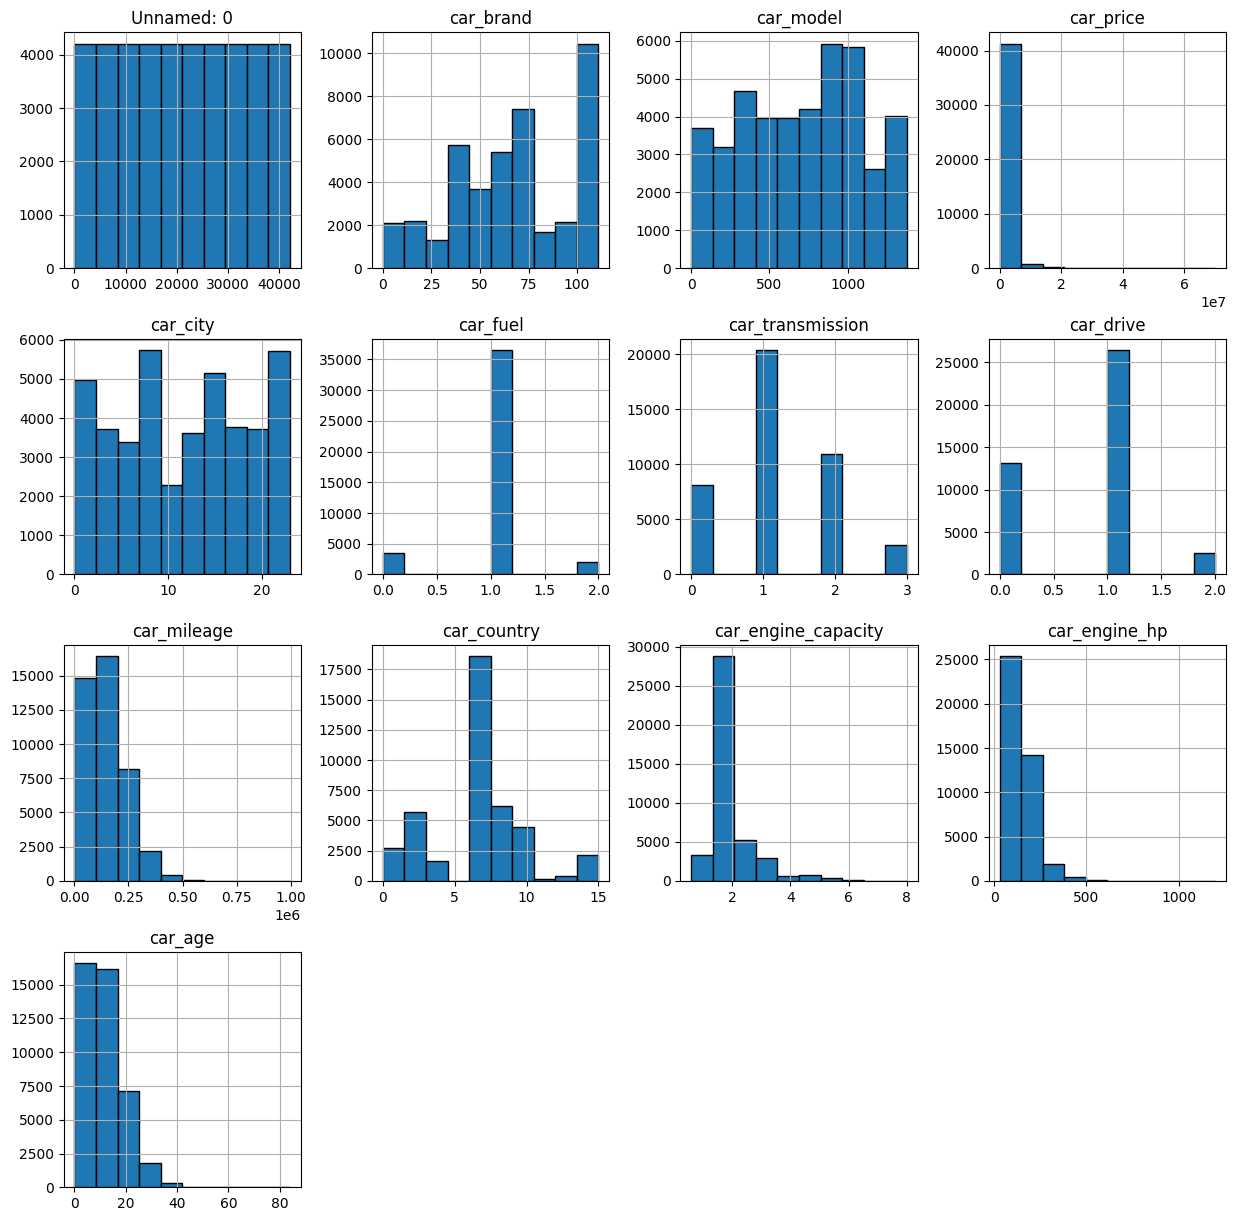

In [ ]:

df.hist(edgecolor = 'k', figsize=(15,15))
plt.show()


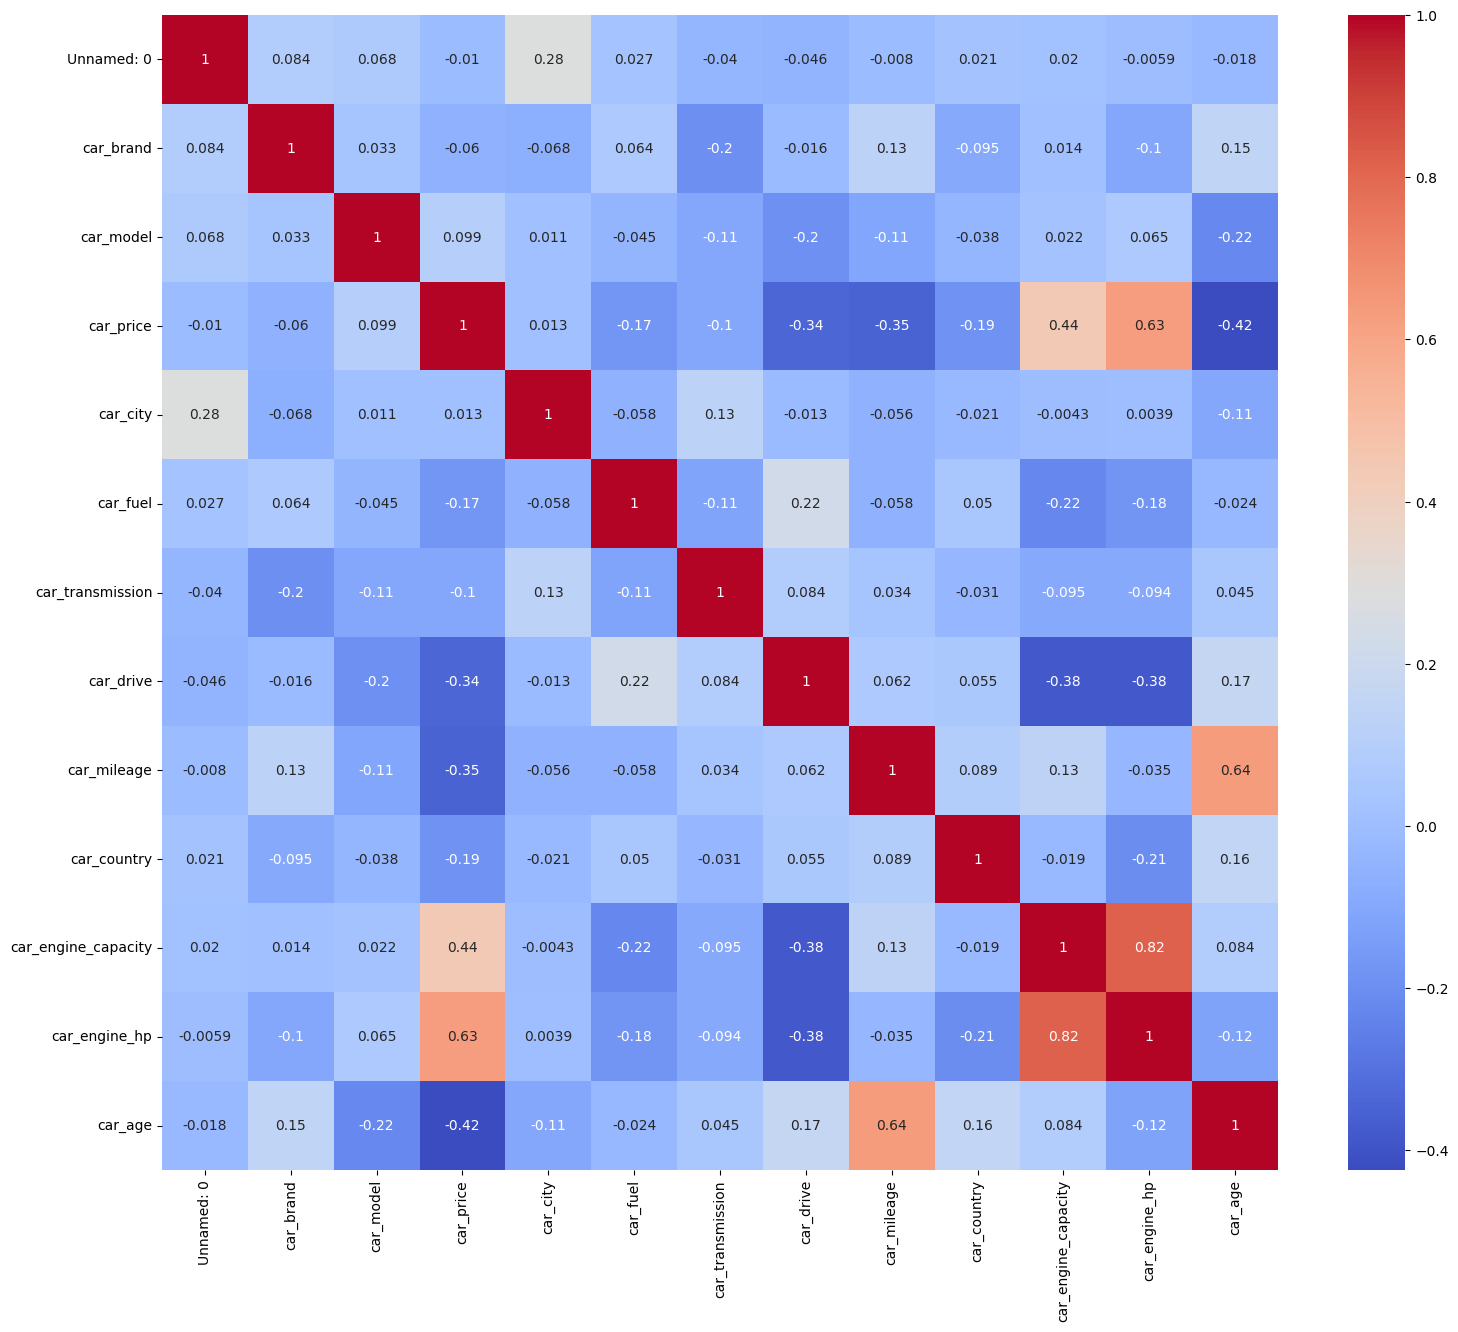

In [ ]:

x = df.corr()
plt.figure(figsize =(18, 15))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


#Dropping Unnecessary Columns:
Unnecessary columns are removed from the dataset to simplify the analysis

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns = ['car_model'],inplace = True)
df.drop(columns = ['car_engine_capacity'],inplace = True)
df.drop(columns = ['car_city'],inplace = True)
df.drop(columns = ['car_fuel'],inplace = True)
df.drop(columns = ['car_transmission'],inplace = True)
df.drop(columns = ['car_brand'],inplace = True)


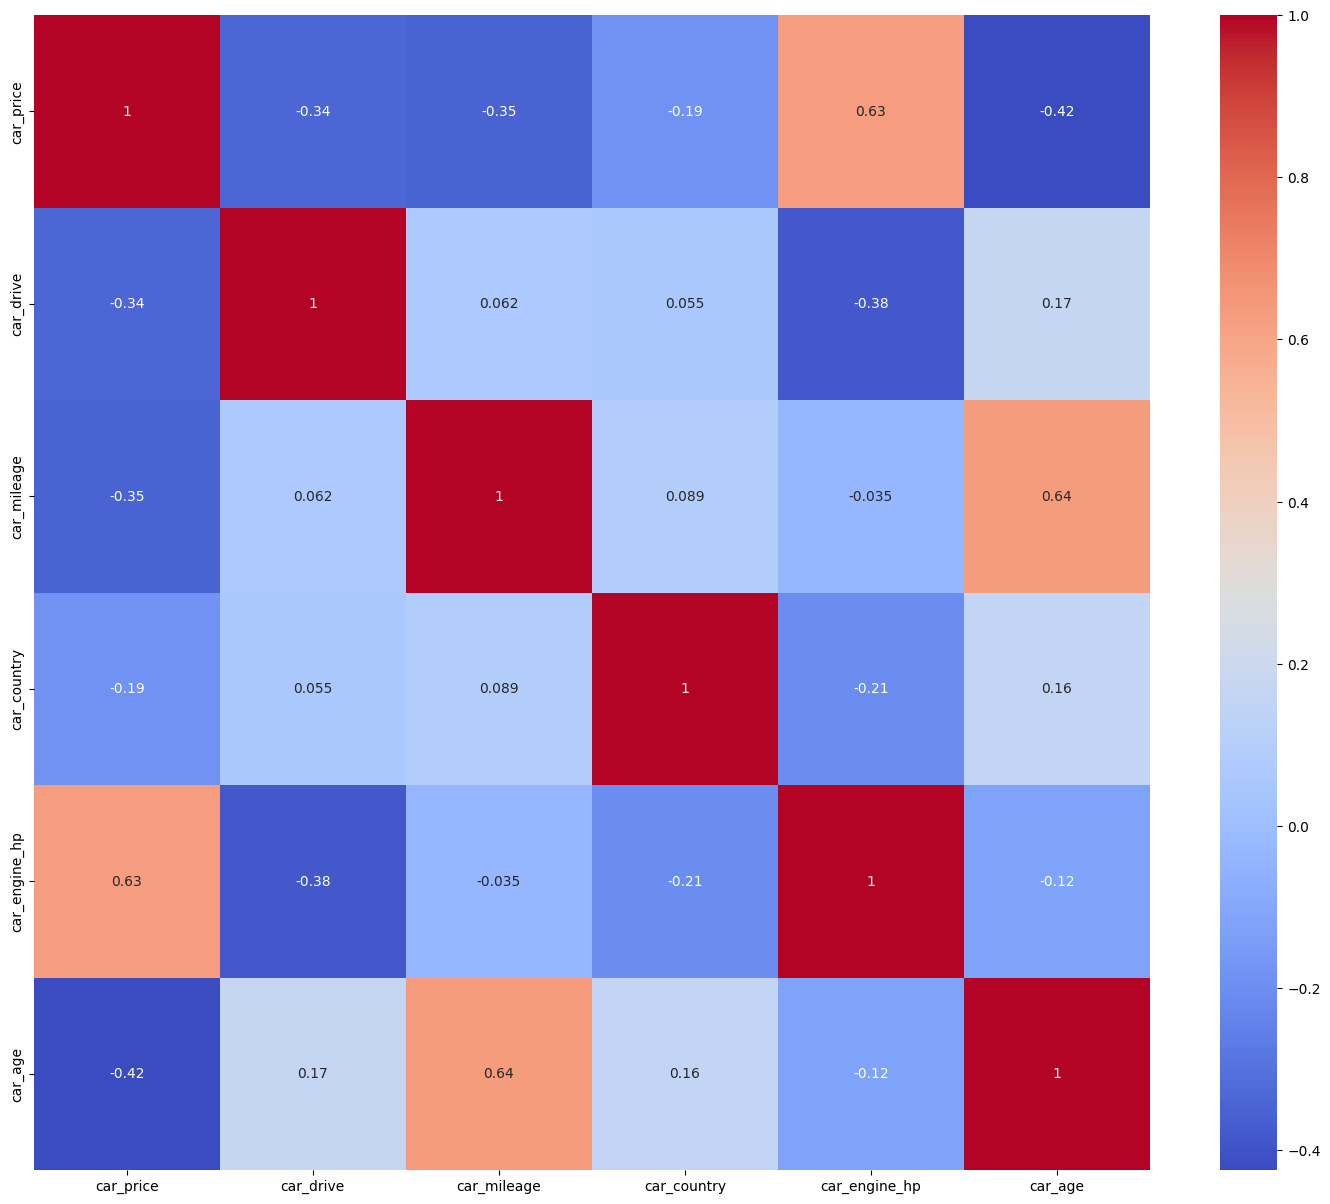

In [ ]:

x = df.corr()
plt.figure(figsize =(18, 15))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


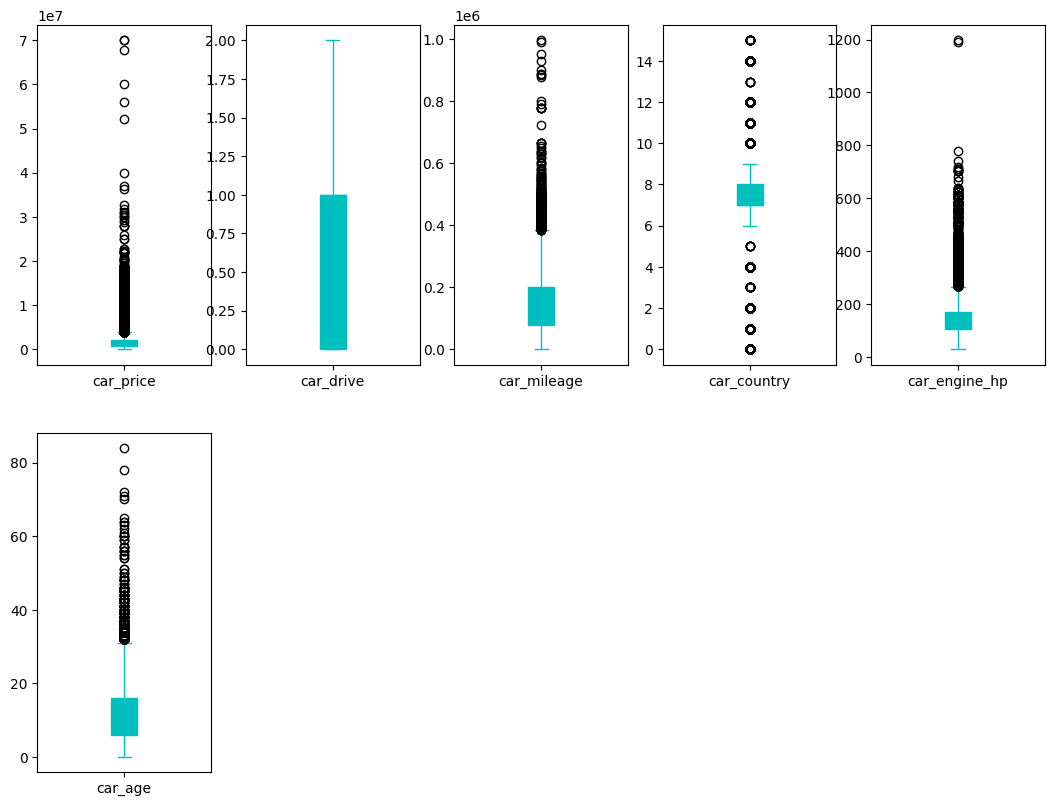

In [ ]:
df.plot(kind='box',subplots=True,
        layout=(3,5),figsize=(13,15),
        color='c',patch_artist=True)

plt.show()


#Handling Outliers:

The function remove_outliers_iqr removes outliers using the Interquartile Range (IQR) method.




In [ ]:

Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3


(6.0, 34.0, 130000.0)

In [ ]:

IQR = Q3 - Q1
IQR


129994.0

In [ ]:

def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 2  * IQR
    upper_bound = Q3 + 2  * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
for i in df.columns:
    df = remove_outliers_iqr(df, i)


#Handling Skewness:

Skewness is handled by applying a log transformation to the data

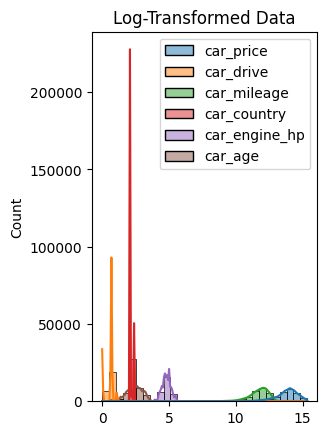

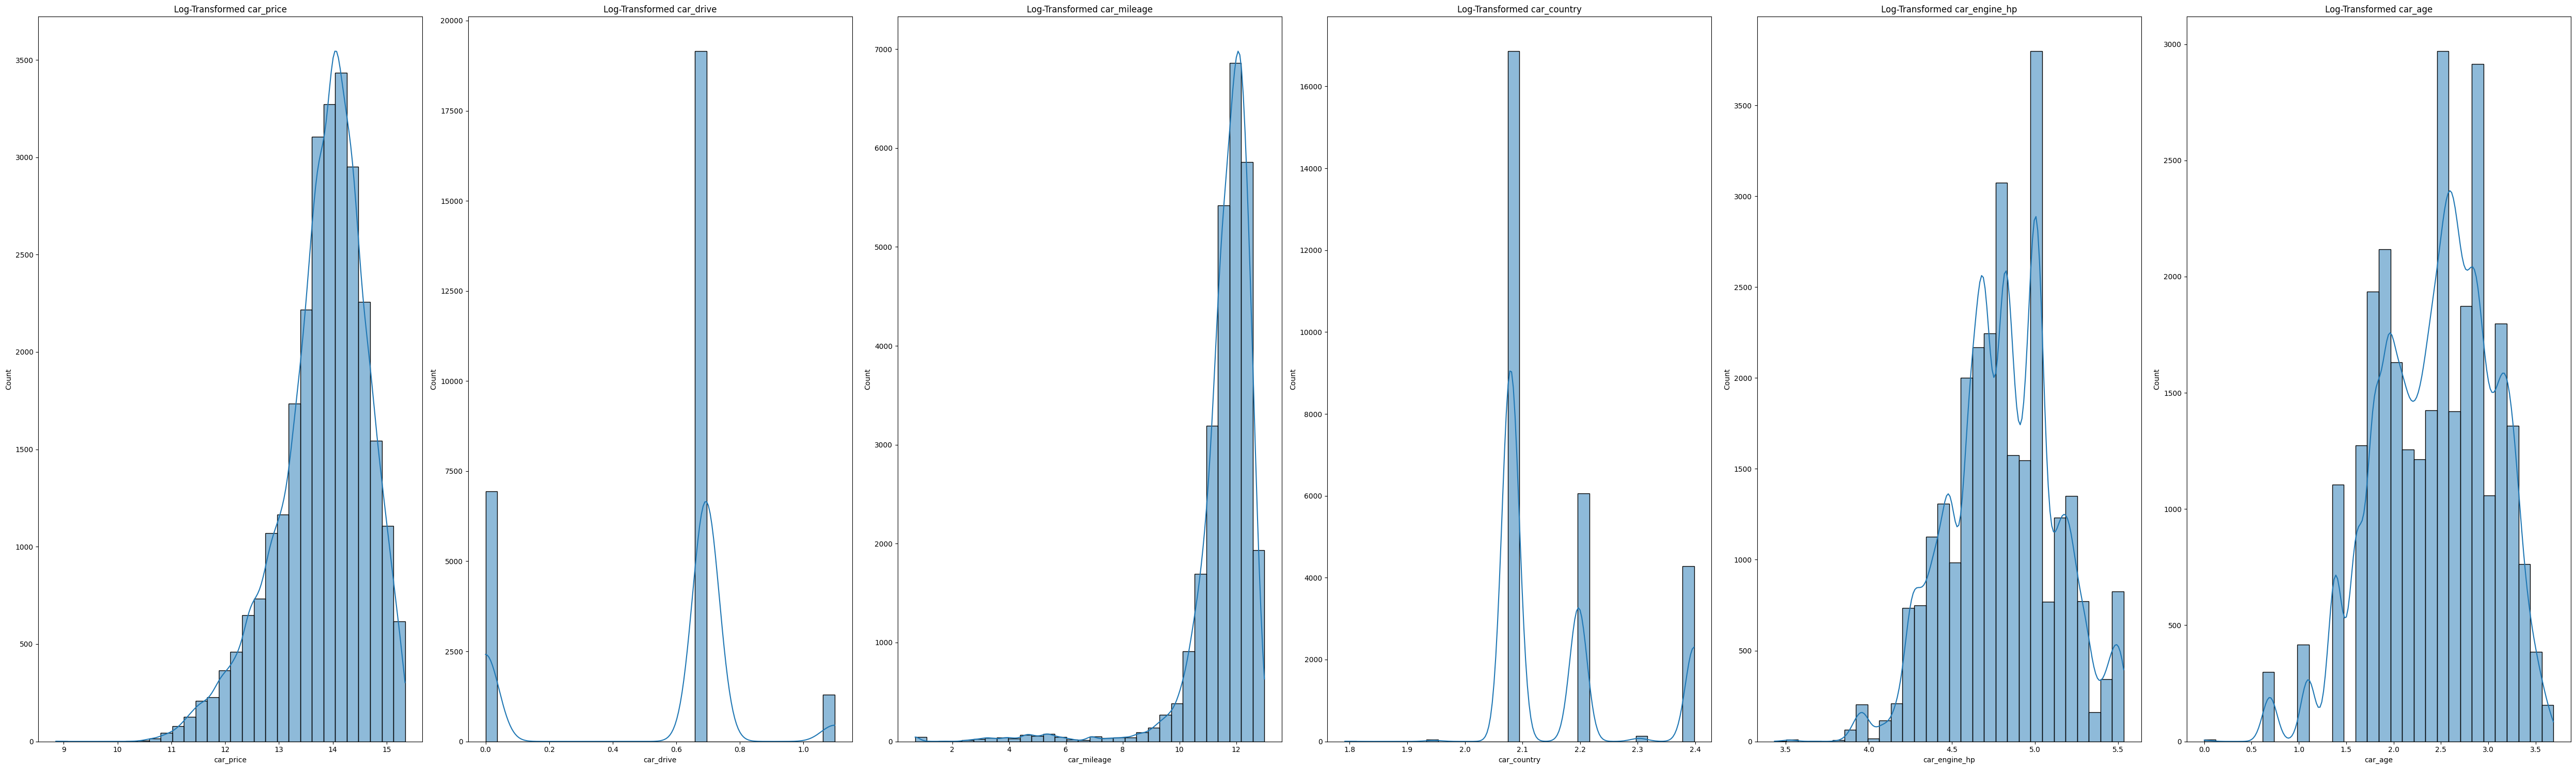

In [ ]:

#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


In [ ]:
df.shape

(27381, 6)

#Preparing Data for Modeling:

The model is used to make predictions based on new user input.



In [ ]:

df = log_data


#Feature and Target Selection Features were selected for modeling


In [ ]:
x = df[['car_mileage', 'car_age', 'car_drive', 'car_country', 'car_engine_hp']]
y = df['car_price']

#Splitting the Data The data was split into training and testing sets


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#train and linear regrassion modal

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Predict and evaluate the model


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([13.83602868, 13.62371672, 13.43387203, ..., 13.8085635 ,
       13.70726   , 13.38726158])

# Take user input for new data  


In [ ]:
car_mileage         = float(input('Enter car_mileage'))
car_age             = float(input('Enter car_age'))
car_drive           = float(input('Enter car_drive'))
car_country         = float(input('Enter car_country'))
car_engine_hp = float(input('Enter car_engine_hp'))
user_input = [[car_mileage, car_age, car_drive, car_country, car_engine_h]]
car_price = model.predict(user_input)
print(f'the predicted :{car_price}')

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

In [ ]:
car_price = model.predict(user_input)
print(f'the predicted :{car_price}')

#Visualizing Results:

A regression plot is generated to visualize the predicted versus actual car prices.



In [ ]:
sns.regplot(x = y_pred, y = y_test)
plt.xlabel("Predicted car_price")